In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_excel("E_i.xlsx")

In [2]:
df

,ID,Date,Prelibt,CIP,DOSE,dosage,Freq,Durée,DCI,ATC,is_ARV,classe_th,E_I
0,1,2004-04-14,BACTRIM cp Ad,3001069,1 Comprimé,400 mg; 80 mg,1 fois / jour,30 jour(s),SULFAMETHOXAZOLE; TRIMETHOPRIME,NaN,0,NaN,NaN
1,1,2004-04-14,KALETRA caps,3566794,3 Capsule,200 mg; 50 mg,Toutes les 12 heures,30 jour(s),LOPINAVIR; RITONAVIR,J05AR10,1,2 IP,NaN
2,1,2004-04-14,COMBIVIR cp enrobé,3466271,1 Comprimé,150 mg; 300 mg,Toutes les 12 heures,30 jour(s),LAMIVUDINE; ZIDOVUDINE,J05AR01,1,2 INTI,NaN
3,2,2013-10-01,TRUVADA 200MG/245MG CPR 30,3656563,1 comprimé,200 mg; 300 mg,par jour,1 mois,EMTRICITABINE; TENOFOVIR DISOPROXIL,J05AR03,1,2 INTI,NaN
4,2,2013-10-01,ISENTRESS 400MG CPR 60,3830848,2 comprimés,"434,4 mg",par jour,1 mois,RALTEGRAVIR,J05AJ01,1,INI,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,16524,2016-04-28,INSPRA 25MG CPR 30,3665705,1 comprimé,25 mg,1 fois par jour(s),28 jour(s),EPLERENONE,C03DA04,0,NaN,NaN
1048571,16524,2016-12-15,INSPRA 25MG CPR 30,3665705,1 comprimé,25 mg,1 fois par jour(s),28 jour(s),EPLERENONE,C03DA04,0,NaN,NaN
1048572,16524,2016-12-15,UVEDOSE 100 000UI/2ML AMP BUV 1,3322218,1 ampoule,100 000 UI,tous les 6 mois,6 mois,CHOLECALCIFEROL,NaN,0,NaN,NaN
1048573,16524,2016-12-15,CLOPIDOGREL 75MG BIOGARAN CPR 30,3968423,1 comprimé,"97,875 mg",par jour(s),30 jour(s),CLOPIDOGREL,B01AC04,0,NaN,NaN


In [3]:
# Harmonisation des textes
cols_text = ["DCI", "ATC", "classe_th", "E_I", "Freq", "Durée"]
for col in cols_text:
    if col in df.columns:
        df[col] = df[col].astype(str).str.strip()
        df[col] = df[col].replace(["nan", "None", ""], np.nan)


In [4]:
df["type_medicament"] = np.where(df["is_ARV"] == 1, "ARV", "Non ARV")


In [5]:
meds_par_patient = df.groupby("ID").size().reset_index(name="nb_medicaments")


In [6]:
print("Nombre total de prescriptions :", len(df))


Nombre total de prescriptions : 1048575


In [7]:
print("Nombre de patients :", df["ID"].nunique())


Nombre de patients : 12859


In [8]:
df["type_medicament"].value_counts()


type_medicament
Non ARV    628938
ARV        419637
Name: count, dtype: int64

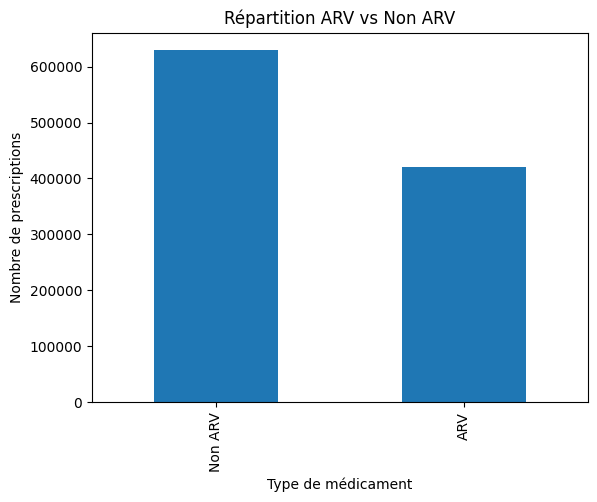

In [9]:
df["type_medicament"].value_counts().plot(kind="bar")
plt.title("Répartition ARV vs Non ARV")
plt.xlabel("Type de médicament")
plt.ylabel("Nombre de prescriptions")
plt.show()


In [10]:
top_medicaments = df["Prelibt"].value_counts().head(10)
top_medicaments


Prelibt
UVEDOSE 100 000UI/2ML AMP BUV 1     59506
NORVIR 100MG CPR 30                 40394
TRUVADA 200MG/245MG CPR 30          39317
PREZISTA 800MG CPR 30               18731
KIVEXA 600MG/300MG CPR 30           18658
ISENTRESS 400MG CPR 60              18090
TRIUMEQ 50MG/600MG/300MG CPR 30     16534
EVIPLERA 200MG/25MG/245MG CPR 30    14823
TIVICAY 50MG CPR 30                 12992
REYATAZ 300MG GELULE 30             11724
Name: count, dtype: int64

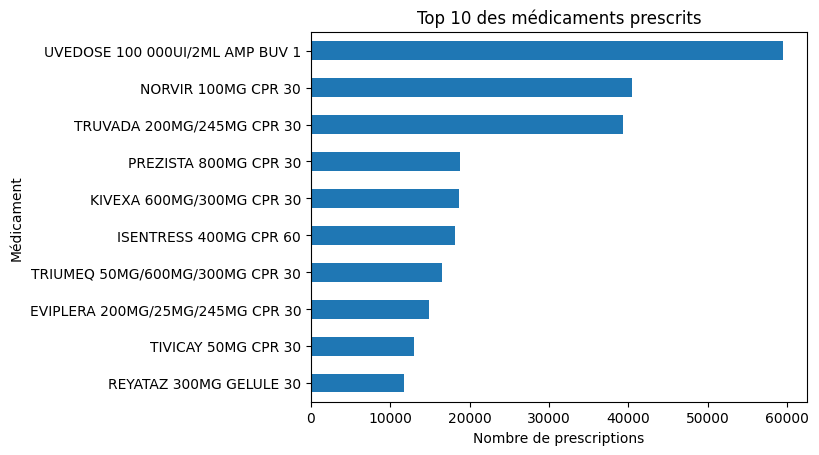

In [11]:
top_medicaments.plot(kind="barh")
plt.title("Top 10 des médicaments prescrits")
plt.xlabel("Nombre de prescriptions")
plt.ylabel("Médicament")
plt.gca().invert_yaxis()
plt.show()


In [12]:
df_arv = df[df["type_medicament"] == "ARV"]


In [13]:
df_arv["classe_th"].value_counts()


classe_th
IP                        116135
2 INTI                     78686
INI                        37795
INTI                       31558
INNTI                      28756
1 INI/ 2 INTI              18415
1 INNTI/2 INTI             17792
1 INI/ 2INTI               16925
1 INI/2 INTI + BOOSTER     14584
1 INNTI/2INTI              12277
2 IP                       10254
1 INI/1 INTI                7493
INI / INSTI                 4777
1 INI/1 INNTI               4688
Name: count, dtype: int64

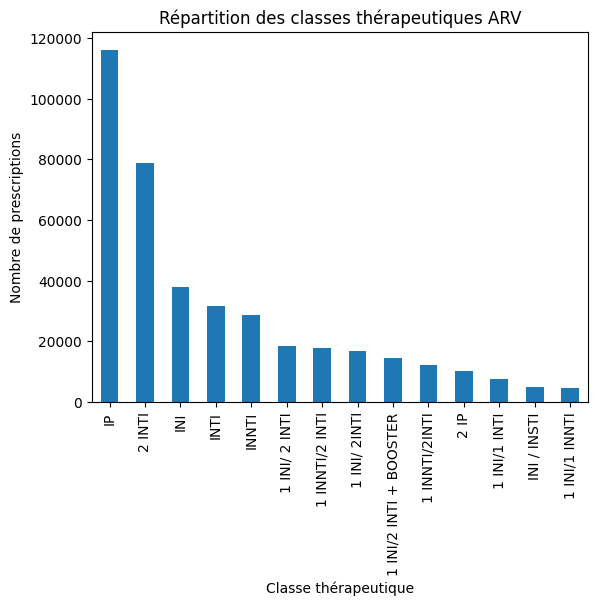

In [14]:
df_arv["classe_th"].value_counts().plot(kind="bar")
plt.title("Répartition des classes thérapeutiques ARV")
plt.xlabel("Classe thérapeutique")
plt.ylabel("Nombre de prescriptions")
plt.show()


In [15]:
df_arv["nb_molecules"] = df_arv["DCI"].str.count(";") + 1


C:\Users\toufi\AppData\Local\Temp\ipykernel_17900\4093292366.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_arv["nb_molecules"] = df_arv["DCI"].str.count(";") + 1


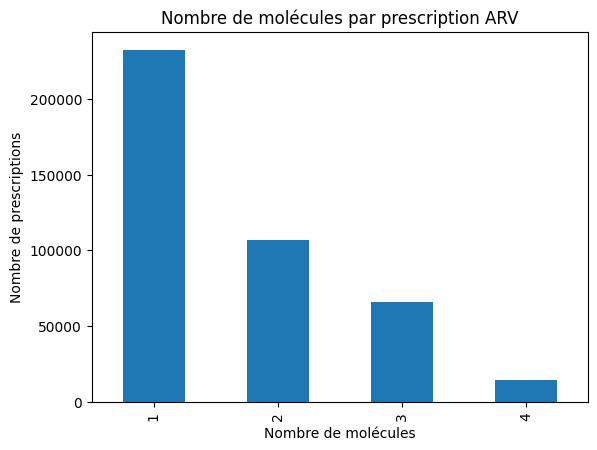

In [16]:
df_arv["nb_molecules"].value_counts().sort_index().plot(kind="bar")
plt.title("Nombre de molécules par prescription ARV")
plt.xlabel("Nombre de molécules")
plt.ylabel("Nombre de prescriptions")
plt.show()


In [17]:
df_non_arv = df[df["type_medicament"] == "Non ARV"]


In [18]:
df_non_arv["ATC"].value_counts().head(10)


ATC
C10AA07    15322
B01AC06    12739
A02BC05     7532
A10BA02     7131
C08CA01     6204
A11CC05     6132
N05BA08     5871
N02BE01     5535
A02BC01     5296
V03AF03     5213
Name: count, dtype: int64

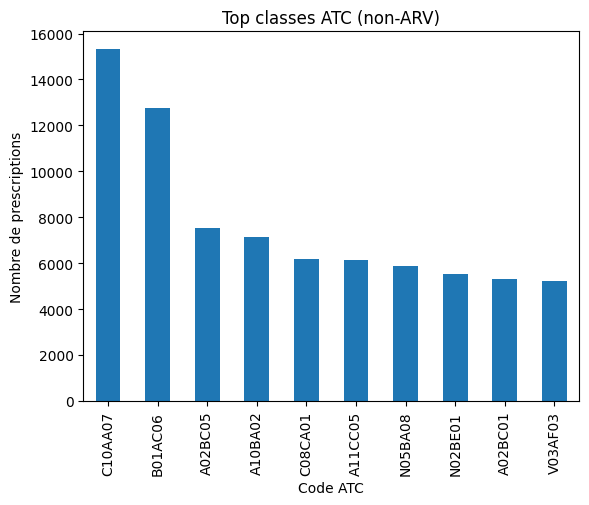

In [19]:
df_non_arv["ATC"].value_counts().head(10).plot(kind="bar")
plt.title("Top classes ATC (non-ARV)")
plt.xlabel("Code ATC")
plt.ylabel("Nombre de prescriptions")
plt.show()


In [20]:
df_ei = df_non_arv[df_non_arv["E_I"].notna()]


In [21]:
ei_exploded = df_ei["E_I"].str.split(";").explode()
ei_exploded = ei_exploded.str.strip()


In [22]:
ei_exploded.value_counts()


E_I
MÉTABOLIQUE            35821
CARDIO-VASCULAIRE      29113
NEUROPSYCHIATRIQUE     26802
DIGESTIF               19610
RÉNAL / OSSEUX          3545
CUTANÉ / ALLERGIQUE     2513
NAN                     1144
HÉPATIQUE/BILIAIRE       460
Name: count, dtype: int64

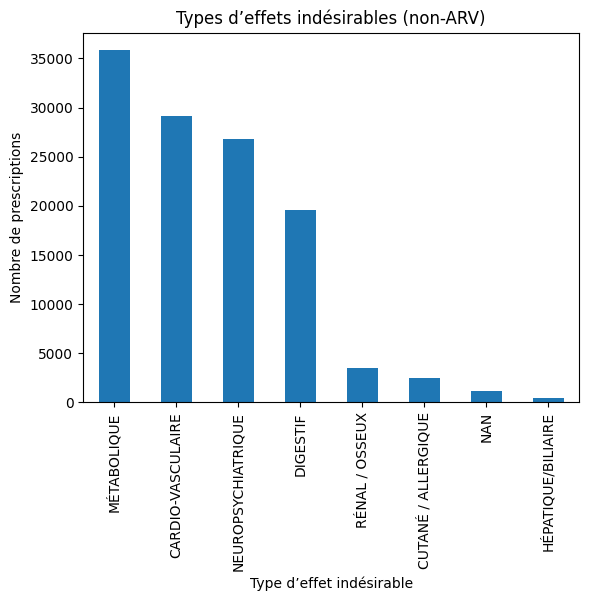

In [23]:
ei_exploded.value_counts().plot(kind="bar")
plt.title("Types d’effets indésirables (non-ARV)")
plt.xlabel("Type d’effet indésirable")
plt.ylabel("Nombre de prescriptions")
plt.show()


In [27]:
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")


In [29]:
prescriptions_par_mois = (
    df.set_index("Date")
      .resample("M")
      .size()
)


C:\Users\toufi\AppData\Local\Temp\ipykernel_17900\805310757.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample("M")


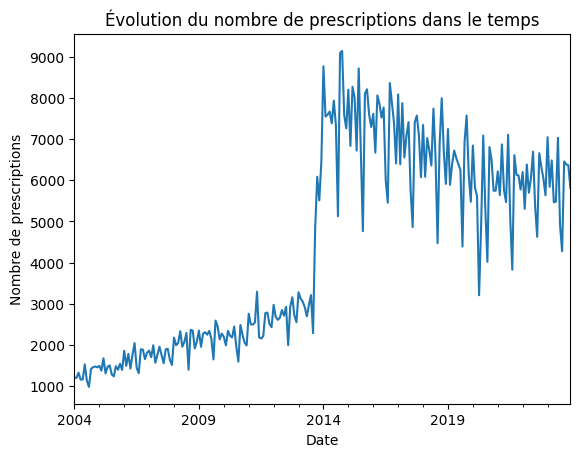

In [30]:
prescriptions_par_mois.plot()
plt.title("Évolution du nombre de prescriptions dans le temps")
plt.xlabel("Date")
plt.ylabel("Nombre de prescriptions")
plt.show()


In [31]:
meds_par_patient["nb_medicaments"].describe()


count    12859.000000
mean        81.544055
std        107.402072
min          1.000000
25%         19.000000
50%         49.000000
75%        103.000000
max       2497.000000
Name: nb_medicaments, dtype: float64

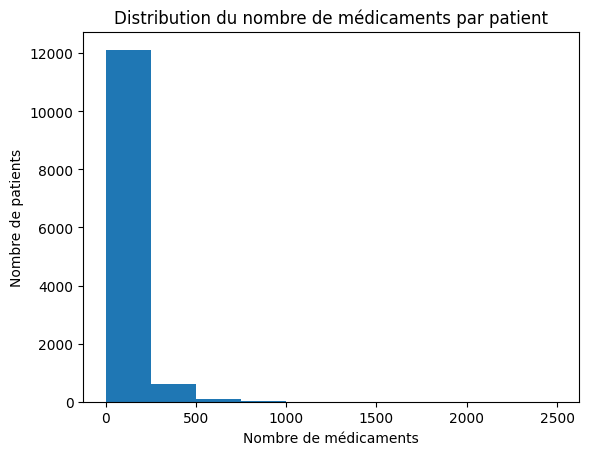

In [32]:
meds_par_patient["nb_medicaments"].plot(kind="hist", bins=10)
plt.title("Distribution du nombre de médicaments par patient")
plt.xlabel("Nombre de médicaments")
plt.ylabel("Nombre de patients")
plt.show()


In [33]:
# top_medicaments.to_excel("top_medicaments.xlsx")
# df_arv["classe_th"].value_counts().to_excel("classes_arv.xlsx")
# ei_exploded.value_counts().to_excel("effets_indesirables.xlsx")


In [34]:
top_medicaments

Prelibt
UVEDOSE 100 000UI/2ML AMP BUV 1     59506
NORVIR 100MG CPR 30                 40394
TRUVADA 200MG/245MG CPR 30          39317
PREZISTA 800MG CPR 30               18731
KIVEXA 600MG/300MG CPR 30           18658
ISENTRESS 400MG CPR 60              18090
TRIUMEQ 50MG/600MG/300MG CPR 30     16534
EVIPLERA 200MG/25MG/245MG CPR 30    14823
TIVICAY 50MG CPR 30                 12992
REYATAZ 300MG GELULE 30             11724
Name: count, dtype: int64

In [35]:
df_arv["classe_th"].value_counts()

classe_th
IP                        116135
2 INTI                     78686
INI                        37795
INTI                       31558
INNTI                      28756
1 INI/ 2 INTI              18415
1 INNTI/2 INTI             17792
1 INI/ 2INTI               16925
1 INI/2 INTI + BOOSTER     14584
1 INNTI/2INTI              12277
2 IP                       10254
1 INI/1 INTI                7493
INI / INSTI                 4777
1 INI/1 INNTI               4688
Name: count, dtype: int64

In [36]:
ei_exploded.value_counts()

E_I
MÉTABOLIQUE            35821
CARDIO-VASCULAIRE      29113
NEUROPSYCHIATRIQUE     26802
DIGESTIF               19610
RÉNAL / OSSEUX          3545
CUTANÉ / ALLERGIQUE     2513
NAN                     1144
HÉPATIQUE/BILIAIRE       460
Name: count, dtype: int64

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Charger le fichier
# df = pd.read_excel("prescriptions_nettoyees.xlsx")

# Harmonisation
df["Prelibt"] = df["Prelibt"].astype(str).str.strip()
df["DCI"] = df["DCI"].astype(str).str.strip()
df["ATC"] = df["ATC"].astype(str).str.strip()
df["classe_th"] = df["classe_th"].astype(str).str.strip()
df["E_I"] = df["E_I"].astype(str).str.strip()
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

# Définir type médicament
df["type_medicament"] = np.where(df["is_ARV"] == 1, "ARV", "Non ARV")


In [40]:
# Chaque traitement = un patient + une date
df["traitement_id"] = df["ID"].astype(str) + "_" + df["Date"].dt.strftime("%Y-%m-%d")


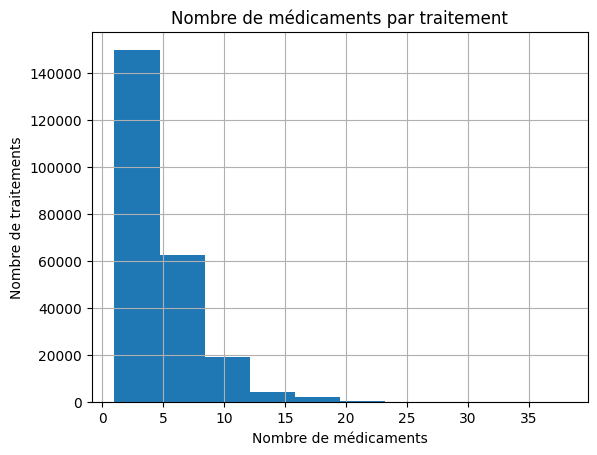

In [41]:
meds_par_traitement = df.groupby("traitement_id").size().reset_index(name="nb_medicaments")
meds_par_traitement["nb_medicaments"].hist(bins=10)
plt.title("Nombre de médicaments par traitement")
plt.xlabel("Nombre de médicaments")
plt.ylabel("Nombre de traitements")
plt.show()


In [ ]:
# Nombre ARV et Non-ARV par traitement
arv_count = df.groupby("traitement_id")["is_ARV"].sum().reset_index(name="nb_ARV")
non_arv_count = df.groupby("traitement_id")["is_ARV"].apply(lambda x: (x==0).sum()).reset_index(name="nb_non_ARV")

counts = pd.merge(arv_count, non_arv_count, on="traitement_id")
counts[["nb_ARV","nb_non_ARV"]].plot(kind="bar", stacked=True, figsize=(12,4))
plt.title("ARV vs Non-ARV par traitement")
plt.xlabel("Traitements")
plt.ylabel("Nombre de médicaments")
plt.show()


In [ ]:
arv_classes = df[df["type_medicament"]=="ARV"].groupby("classe_th")["Prelibt"].count().sort_values(ascending=False)
arv_classes.plot(kind="bar", figsize=(8,4))
plt.title("Répartition des classes thérapeutiques ARV")
plt.xlabel("Classe thérapeutique")
plt.ylabel("Nombre de prescriptions")
plt.show()


In [ ]:
# Nombre de traitements avec au moins 1 ARV et au moins 1 non-ARV
combinaison = df.groupby("traitement_id")["type_medicament"].apply(lambda x: pd.Series({
    "ARV": (x=="ARV").sum(),
    "Non_ARV": (x=="Non ARV").sum()
})).reset_index()

combinaison["combo"] = combinaison.apply(lambda x: "ARV seul" if x["Non_ARV"]==0 else ("Non-ARV seul" if x["ARV"]==0 else "Mixte"), axis=1)
sns.countplot(data=combinaison, x="combo")
plt.title("Répartition des traitements ARV / Non-ARV / Mixte")
plt.show()


In [ ]:
# Exploser les colonnes E_I pour les non-ARV
df_non_arv = df[df["type_medicament"]=="Non ARV"].copy()
df_non_arv = df_non_arv[df_non_arv["E_I"].notna()]
ei_exploded = df_non_arv.assign(EI=df_non_arv["E_I"].str.split(";")).explode("EI")
ei_exploded["EI"] = ei_exploded["EI"].str.strip()

# Nombre d’effets indésirables par type
ei_count = ei_exploded.groupby("EI")["traitement_id"].nunique().sort_values(ascending=False)
ei_count.plot(kind="bar", figsize=(10,4))
plt.title("Nombre de traitements concernés par chaque type d’effet indésirable (Non-ARV)")
plt.xlabel("Effet indésirable")
plt.ylabel("Nombre de traitements")
plt.show()


In [ ]:
# Explosion des classes ARV
df_arv = df[df["type_medicament"]=="ARV"].copy()
df_arv = df_arv[df_arv["classe_th"].notna()]

# Compter nombre de prescriptions par classe ARV
classe_count = df_arv.groupby("classe_th")["Prelibt"].count()
classe_count.plot(kind="bar", figsize=(8,4))
plt.title("Nombre de prescriptions ARV par classe thérapeutique")
plt.xlabel("Classe ARV")
plt.ylabel("Nombre de prescriptions")
plt.show()


In [ ]:
# Médecin peut voir ARV + Non-ARV par traitement
heatmap_data = df.pivot_table(index="traitement_id", columns="type_medicament", values="Prelibt", aggfunc="count", fill_value=0)
sns.heatmap(heatmap_data, cmap="Blues")
plt.title("Visualisation des traitements ARV et Non-ARV par visite")
plt.show()


In [ ]:
# ARV
df_arv.set_index("date").resample("M")["Prelibt"].count().plot(label="ARV")
# Non-ARV
df_non_arv.set_index("date").resample("M")["Prelibt"].count().plot(label="Non-ARV")
plt.legend()
plt.title("Évolution des prescriptions dans le temps")
plt.xlabel("Date")
plt.ylabel("Nombre de prescriptions")
plt.show()


In [ ]:
# Top médicaments
df["Prelibt"].value_counts().to_excel("top_medicaments.xlsx")
# Top effets indésirables non-ARV
ei_count.to_excel("effets_indesirables.xlsx")
# ARV par classe
classe_count.to_excel("ARV_classes.xlsx")
